In [1]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 14/12/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 18/11/2022\nPython version: 3.8.8\n'

# Bechdel Analysis
>The Bechdel test is a commonly used tool to evaluate the representation of women in fiction. To pass the test, a work of fiction must meet the following three criteria:
\
-It must have at least two named female characters.\
-Those two female characters must have a conversation with each other.\
-That conversation must be about something other than a man.\
While the Bechdel test is not perfect, it is a useful tool to identify gender imbalance in works of fiction. By requiring that female characters have their own agency and agency and engage in conversations with each other about topics other than men, the test encourages writers to create more well-rounded and realistic female characters. We have found a dataset which 



---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***
- python=3.8.12
- pandas
- ast
- datetime
- seaborn
- numpy
- matplotlib
- json

In [25]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t 

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

### Pre-processing <a id="#Pre-pro"> </a>
>basic sanity checks etc...

>We are going to load the bechdel dataset. It was downloaded from kaggle https://www.kaggle.com/datasets/alisonyao/movie-bechdel-test-scores?resource=download&select=Bechdel_detailed.csv. 

In [30]:
PATH_DATA = 'data/'

#additionnal datasets:
PATH_MOVIE_BECHDEL = PATH_DATA+'Bechdel.csv'

In [41]:
bechdel=pd.read_csv(PATH_MOVIE_BECHDEL,header=0)
#delte the first column because it conatins the index
del bechdel['id']
bechdel

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
9368,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
9369,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0
9370,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0
9371,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


In [47]:
#check for missing values delete rows with missing values
bechdel= bechdel.dropna().reset_index(drop=True)
bechdel.isna().sum()

title          0
year           0
rating         0
dubious        0
imdbid         0
id.1           0
submitterid    0
date           0
visible        0
dtype: int64

In [48]:
print('there are',len(bechdel),'movies in the bechdel dataset')

there are 9074 movies in the bechdel dataset


In [52]:
#check for duplicates and print print the duplicates
bechdel[bechdel.duplicated()]

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
839,Saboteur,1956.0,1.0,0.0,35279.0,5938.0,11248.0,2014-11-22 17:38:29,1.0
1924,Terms of Endearment,1983.0,1.0,1.0,86425.0,4448.0,7970.0,2013-08-07 09:53:44,1.0
3149,Ayneh,1997.0,3.0,0.0,117056.0,4380.0,7796.0,2013-07-21 16:53:37,1.0
6183,Last Call at the Oasis,2011.0,3.0,0.0,2043900.0,4889.0,8867.0,2013-11-29 21:16:54,1.0
6826,Puella Magi Madoka Magica the Movie Part III: ...,2013.0,3.0,0.0,2457282.0,4980.0,9023.0,2013-12-24 20:34:24,1.0
8075,Moana,2016.0,3.0,0.0,3521164.0,7292.0,14251.0,2016-11-24 02:28:18,1.0
8834,Descendants 3,2019.0,3.0,0.0,8022928.0,8816.0,17295.0,2019-08-12 18:52:11,1.0
9063,"Suicide Squad, The",2021.0,3.0,0.0,6334354.0,10004.0,19435.0,2021-08-08 22:16:55,1.0
9070,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0


In [53]:
#looking at the 9 duplicates in the csv file, we can confirm that there has been a mistake in the data collection, so we will delete the duplicates
bechdel=bechdel.drop_duplicates().reset_index(drop=True)

In [49]:
#check for repeated values in the columns
print('there are',len(bechdel['imdbid'].unique()),'unique imdbids')
print('there are',len(bechdel['title'].unique()),'unique titles')


there are 9062 unique imdbids
there are 8856 unique titles


## TODO regarder la procédure pour les duplicates dans les rows 

In [68]:
#print duplicates in the title column
bechdel[bechdel.duplicated(subset=['title'])].head(10)


,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible


In [66]:
#delete rows with duplicate imdbids and titles, we will delete approximately 250 rows 
bechdel = bechdel.drop_duplicates(subset=['imdbid'], keep='first')
bechdel = bechdel.drop_duplicates(subset=['title'], keep='first')



In [67]:
#reset the index of the dataframe
bechdel = bechdel.reset_index(drop=True)
bechdel

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
8851,There&#39;s Someone Inside Your House,2021.0,3.0,0.0,8150814.0,10147.0,19727.0,2021-11-30 16:18:27,1.0
8852,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0
8853,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
8854,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


## first analyses

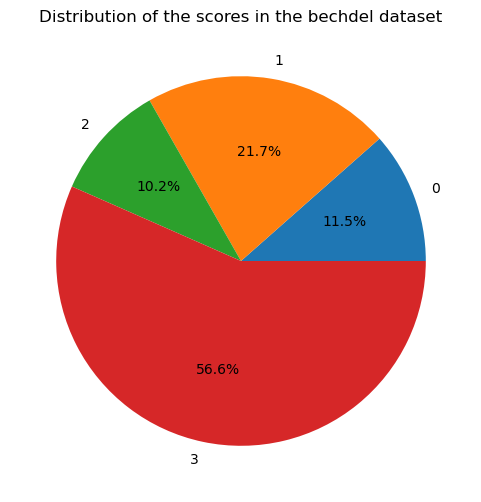

In [59]:
score0 = bechdel[bechdel['rating'] ==0]
score1 = bechdel[bechdel['rating'] ==1]
score2 = bechdel[bechdel['rating'] ==2]
score3 = bechdel[bechdel['rating'] ==3]

#plot score0, score1, score, score3 in pie chart
plt.figure(figsize=(6,6))
plt.pie([len(score0), len(score1), len(score2), len(score3)], labels=['0', '1', '2', '3'], autopct='%1.1f%%')
plt.title('Distribution of the scores in the bechdel dataset')
plt.show()


> From the above plot, it appears that the test isn't that difficult to pass as more than a half of the movies in the dataset. It would be too simple to assert that movies passing the bechdel test are better in terms of gender equality. However, through our research, it was the only "simple data" we found to assess the gender equality. As a first insight, it seems good to perform some analyses on it. 


> we need to figure out what to do with the dubious ratings

In [69]:
# get the percentage of movies with dubious rating
dubious = bechdel[bechdel['dubious'] == 1]
print('there are',len(dubious),'dubious ratings in the bechdel dataset')
print('this is',round(len(dubious)/len(bechdel)*100,2),'% of the total number of movies')


there are 785 dubious ratings in the bechdel dataset
this is 8.86 % of the total number of movies


> As we can see, they represent nearly 9 %, just deleting the rows would be a little bit to quick. Instead, what we are going to deal with them

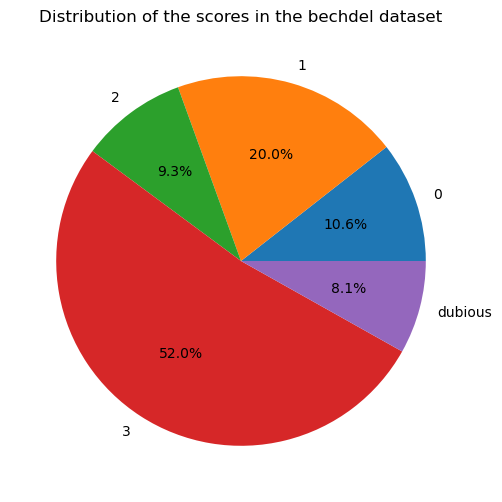

In [70]:
#distribution of the scores in the bechdel dataset
plt.figure(figsize=(6,6))
plt.pie([len(score0), len(score1), len(score2), len(score3), len(dubious)], labels=['0', '1', '2', '3', 'dubious'], autopct='%1.1f%%')
plt.title('Distribution of the scores in the bechdel dataset')
plt.show()

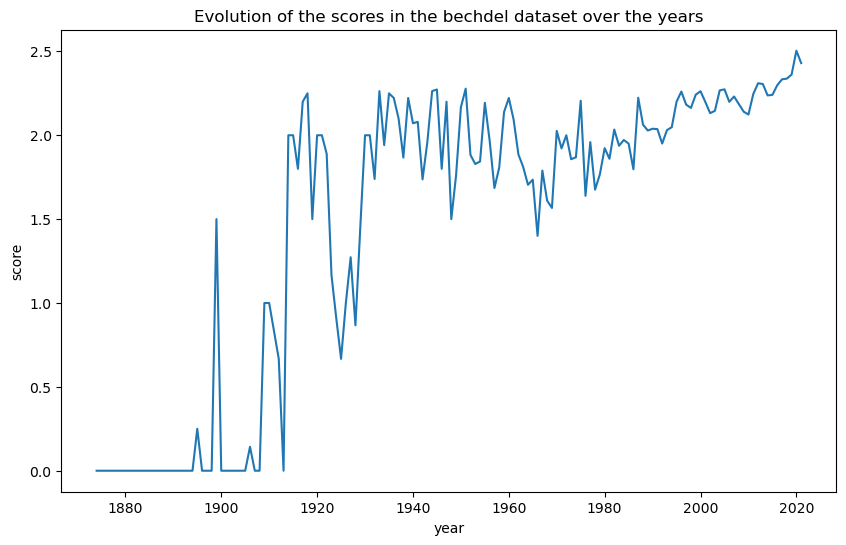

In [81]:
#evolution of the scores in the bechdel dataset over the years
plt.figure(figsize=(10,6))
plt.plot(bechdel.groupby('year')['rating'].mean())
plt.title('Evolution of the scores in the bechdel dataset over the years')
plt.xlabel('year')
plt.ylabel('score')
plt.show()


> the mean of the bechdel score seems to be increasing over the years, let's now see the evolution of each feature

In [94]:
#create a copy of the bechdel dataset
bechdel_copy = bechdel.copy()
#bechel.dubious==1 replace rating by -1
bechdel_copy.loc[bechdel['dubious'] == 1, 'rating'] = -1


In [137]:
#create a dataframe percentage of movies with score 0, 1, 2, 3, -1 grouped by year
bechdel_score_evol = pd.DataFrame(bechdel_copy.groupby('year')['rating'].value_counts(normalize=True).unstack())
bechdel_score_evol = bechdel_score_evol.reset_index()
bechdel_score_evol = bechdel_score_evol.rename(columns={-1:'dubious', 0:'0', 1:'1', 2:'2', 3:'3'})
bechdel_score_evol
#sanity check
#col_list= ['dubious', 'less than 2 women', 'at least 2 women','talk 2 each other', 'about something other than man' ]
#bechdel_score_evol['Sum'] = bechdel_score_evol[col_list].sum(axis=1)
#bechdel_score_evol

#new column with decade
bechdel_score_evol['decade'] = bechdel_score_evol['year'].apply(lambda x: str(x)[0:3]+'0')
bechdel_score_evol



rating,year,dubious,0,1,2,3,decade
0,1874.0,NaN,1.000000,NaN,NaN,NaN,1870
1,1877.0,NaN,1.000000,NaN,NaN,NaN,1870
2,1878.0,NaN,1.000000,NaN,NaN,NaN,1870
3,1881.0,NaN,1.000000,NaN,NaN,NaN,1880
4,1883.0,NaN,1.000000,NaN,NaN,NaN,1880
...,...,...,...,...,...,...,...
135,2017.0,0.121212,0.071970,0.185606,0.064394,0.556818,2010
136,2018.0,0.091667,0.075000,0.166667,0.079167,0.587500,2010
137,2019.0,0.072340,0.059574,0.174468,0.059574,0.634043,2010
138,2020.0,0.110236,0.062992,0.110236,0.055118,0.661417,2020


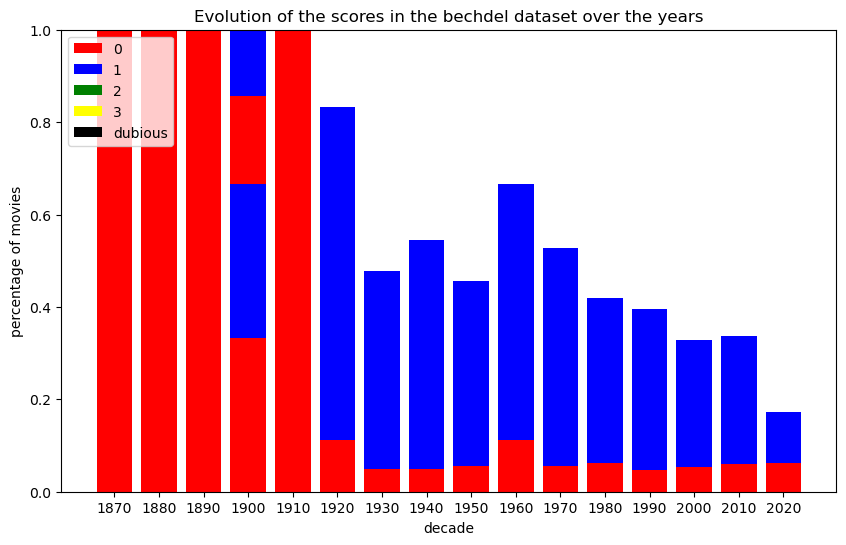

In [144]:
# bar stacked plot by decade
plt.figure(figsize=(10,6))
plt.bar(bechdel_score_evol['decade'], bechdel_score_evol['0'], color='red', label='0')
plt.bar(bechdel_score_evol['decade'], bechdel_score_evol['1'], bottom=bechdel_score_evol['0'], color='blue', label='1')
plt.bar(bechdel_score_evol['decade'], bechdel_score_evol['2'], bottom=bechdel_score_evol['0']+bechdel_score_evol['1'], color='green', label='2')
plt.bar(bechdel_score_evol['decade'], bechdel_score_evol['3'], bottom=bechdel_score_evol['0']+bechdel_score_evol['1']+bechdel_score_evol['2'], color='yellow', label='3')
plt.bar(bechdel_score_evol['decade'], bechdel_score_evol['dubious'], bottom=bechdel_score_evol['0']+bechdel_score_evol['1']+bechdel_score_evol['2']+bechdel_score_evol['3'], color='black', label='dubious')
plt.title('Evolution of the scores in the bechdel dataset over the years')
plt.xlabel('decade')
plt.ylabel('percentage of movies')
plt.legend()
plt.show()
